In [1]:
import numpy as np
import phate
from sklearn.model_selection import train_test_split
import scprep
from scipy.spatial.distance import pdist, squareform, cdist

In [2]:
data = np.load('../data/eb.npz')

In [3]:
test_size=0.5
seed=42
ids = np.arange(0, data['data'].shape[0])
id_train, id_test = train_test_split(ids, test_size=test_size, random_state=seed)
is_train = np.isin(ids, id_train)

In [4]:
np.savez('../data/eb_all.npz', data=data['data'], phate=data['phate'], dist=data['dist'], colors=data['colors'], is_train=is_train)

## phate on train and on test
recompute

In [14]:
X_train = data['data'][id_train]
X_test = data['data'][id_test]

In [15]:
phate_op_train = phate.PHATE(n_jobs=-1)
phate_op_train.fit(X_train)
phate_op_test = phate.PHATE(n_jobs=-1)
phate_op_test.fit(X_test)

Running PHATE on 8410 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 6.03 seconds.
  Calculating affinities...
  Calculated affinities in 0.16 seconds.
Calculated graph and diffusion operator in 6.21 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 1.00 seconds.
  Calculating KMeans...
  Calculated KMeans in 8.91 seconds.
Calculated landmark operator in 11.60 seconds.
Running PHATE on 8411 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 5.75 seconds.
  Calculating affinities...
  Calculated affinities in 0.13 seconds.
Calculated graph and diffusion operator in 5.90 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 1.06 seconds.
  Calculating KMeans...
  Calculated KMeans in 9.17 seconds.
Calculated landmark operator in 11.77 seconds.


PHATE(n_jobs=-1)

In [19]:
phate_train = phate_op_train.transform(X_train)
phate_test = phate_op_test.transform(X_test)

Calculating optimal t...
  Automatically selected t = 16
Calculated optimal t in 7.49 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.90 seconds.
Calculating metric MDS...
Calculated metric MDS in 8.00 seconds.


<Axes: title={'center': 'PHATE of training data'}>

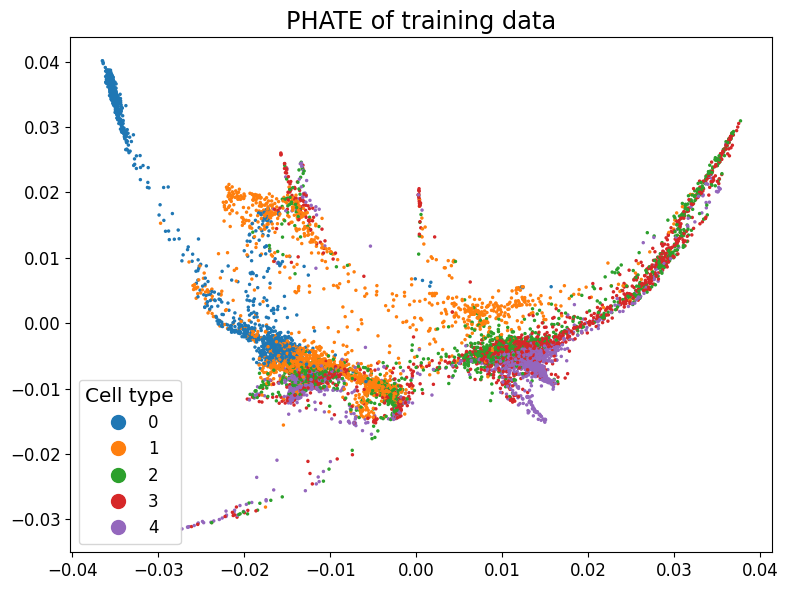

In [24]:
scprep.plot.scatter2d(phate_train, c=data['colors'][id_train], title='PHATE of training data', legend_title='Cell type', figsize=(8, 6))

<Axes: title={'center': 'PHATE of test data'}>

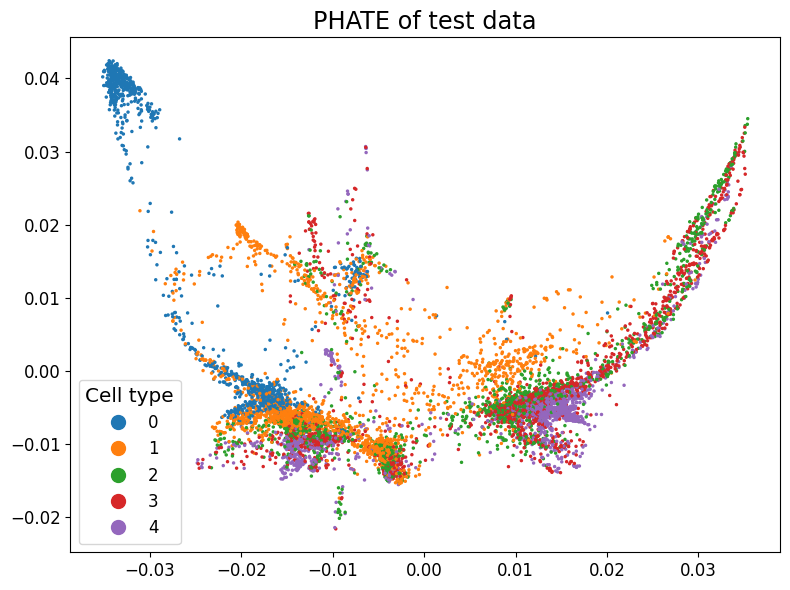

In [25]:
scprep.plot.scatter2d(phate_test, c=data['colors'][id_test], title='PHATE of test data', legend_title='Cell type', figsize=(8, 6))